In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


Here i've loaded the dataset

In [24]:
data = pd.read_csv('RTA Dataset.csv')

Now display

In [25]:
print(data.head())

       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

Drop irrelevant columns

In [26]:
dropped_columns = ['Time', "Vehicle_driver_relation", "Owner_of_vehicle", "Work_of_casuality", "Fitness_of_casuality"]
data = data.drop(columns= dropped_columns)

Missing values handling

In [27]:
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['number']).columns

categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='mean')

data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])
data[numerical_columns] = numerical_imputer.fit_transform(data[numerical_columns])


In [28]:
categorical_features = data.select_dtypes(include=['object']).columns
data[categorical_features] = data[categorical_features].apply(LabelEncoder().fit_transform)

In [29]:
X = data.drop('Accident_severity', axis = 1)
Y = data['Accident_severity']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [34]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [35]:
y_pred = rf_model.predict(X_test)

In [20]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[   0    0   37]
 [   0    9  354]
 [   0    5 2059]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.64      0.02      0.05       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.49      0.34      0.32      2464
weighted avg       0.80      0.84      0.77      2464



c:\Users\joabj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\joabj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\joabj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 83.93%


In [42]:
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
                             Importance
Cause_of_accident              0.085241
Type_of_vehicle                0.073911
Day_of_week                    0.071216
Area_accident_occured          0.063336
Driving_experience             0.062046
Lanes_or_Medians               0.052565
Age_band_of_driver             0.051546
Vehicle_movement               0.049525
Number_of_vehicles_involved    0.048158
Service_year_of_vehicle        0.047064
Types_of_Junction              0.041336
Educational_level              0.039756
Number_of_casualties           0.038057
Type_of_collision              0.036186
Age_band_of_casualty           0.036023
Casualty_class                 0.027368
Light_conditions               0.025222
Road_allignment                0.024881
Weather_conditions             0.023146
Sex_of_casualty                0.022910
Road_surface_conditions        0.019171
Casualty_severity              0.016775
Pedestrian_movement            0.015077
Road_surface_type 

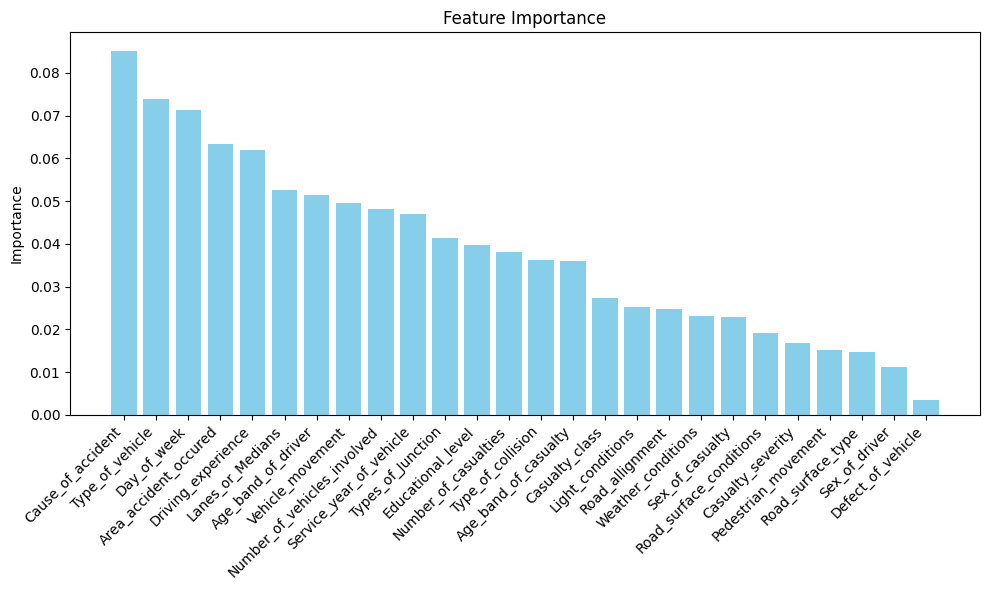

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index, feature_importances['Importance'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [45]:
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']